## Week 10, Assignment 10, Question 1

### The Climate Hazards Group at UC Santa Barbera produces a 30+ year quasi global dataset called CHIRPS. You can download the precipitation data as rasters here: ftp://ftp.chg.ucsb.edu/pub/org/chg/products/CHIRP/.

### For this exercise:
* Download the first 36 rasters here: ftp://ftp.chg.ucsb.edu/pub/org/chg/products/CHIRP/dekads/. This data has 3 precipitation rasters per month, 1 every ten days, totaling 36 rasters in a year.
* Read each raster into a numpy array and concatenate those numpy arrays into a matrix of dimmension (36,x,y)
* Using matplotlib, plot a few slices of the array so that we can see the rainfall over time.
* Are the rainfall trends periodic?
* Challenge: Extract the time frame the filenames and plot some rainfall values (on the y-axis) vs. time (on the x-axis).

### Downloaded first 36 rasters

### Read each raster into a numpy array and concatenate those numpy arrays into a matrix of dimmension (36,x,y)

In [1]:
import numpy as np

In [2]:
import os

In [13]:
import arcpy

### list of TIF CHIRP files in folder

In [14]:
tif_files = []
for file in os.listdir():
    if 'tif'  in file:
        tif_files.append(file)
print(tif_files)

['CHIRP.1981.01.1.tif', 'CHIRP.1981.01.2.tif', 'CHIRP.1981.01.3.tif', 'CHIRP.1981.02.1.tif', 'CHIRP.1981.02.2.tif', 'CHIRP.1981.02.3.tif', 'CHIRP.1981.03.1.tif', 'CHIRP.1981.03.2.tif', 'CHIRP.1981.03.3.tif', 'CHIRP.1981.04.1.tif', 'CHIRP.1981.04.2.tif', 'CHIRP.1981.04.3.tif', 'CHIRP.1981.05.1.tif', 'CHIRP.1981.05.2.tif', 'CHIRP.1981.05.3.tif', 'CHIRP.1981.06.1.tif', 'CHIRP.1981.06.2.tif', 'CHIRP.1981.06.3.tif', 'CHIRP.1981.07.1.tif', 'CHIRP.1981.07.2.tif', 'CHIRP.1981.07.3.tif', 'CHIRP.1981.11.3.tif']


In [20]:
single_raster = "CHIRP.1981.01.1.TIF"
myRaster = arcpy.RasterToNumPyArray(single_raster)
myRaster.shape

(2000, 7200)

In [22]:
landsat_pixels = np.zeros((36, myRaster.shape[0], myRaster.shape[1] ))
landsat_pixels

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [71]:
range1 = range(1,37)
range1

range(1, 37)

In [76]:
for idx,tif in enumerate (tif_files):
    landsat_pixels[range1[idx]-1,:,:] = arcpy.RasterToNumPyArray(tif)

### Using matplotlib, plot a few slices of the array so that we can see the rainfall over time.

In [84]:
import matplotlib.pyplot as plt

In [85]:
%matplotlib notebook

<IPython.core.display.Javascript object>


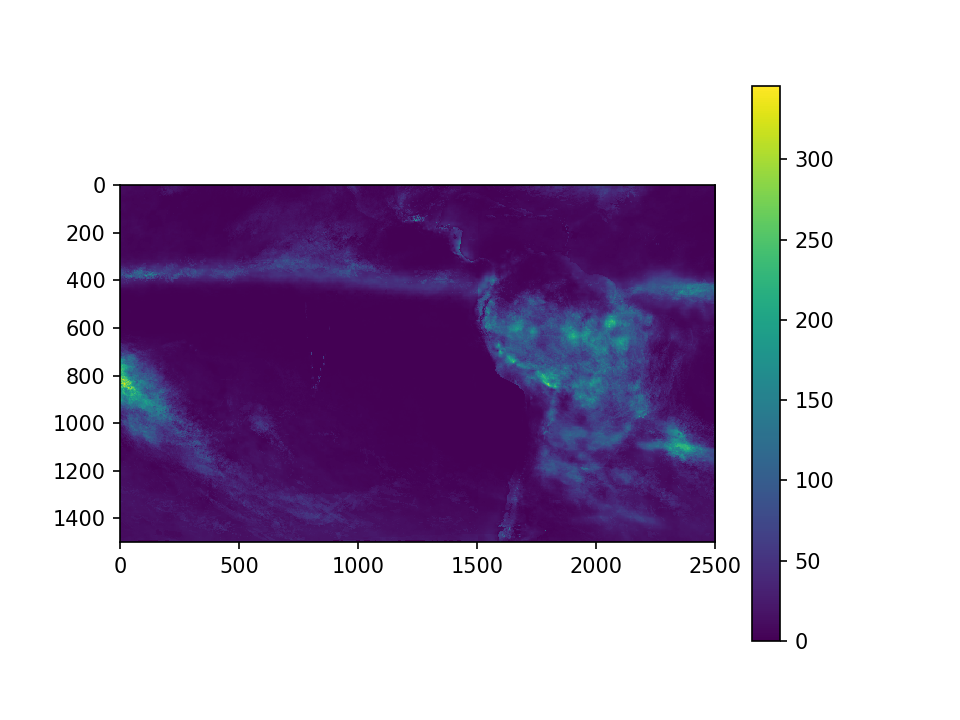

In [86]:
plt.imshow(landsat_pixels[1,500:3000,500:3000])
plt.colorbar()

<IPython.core.display.Javascript object>


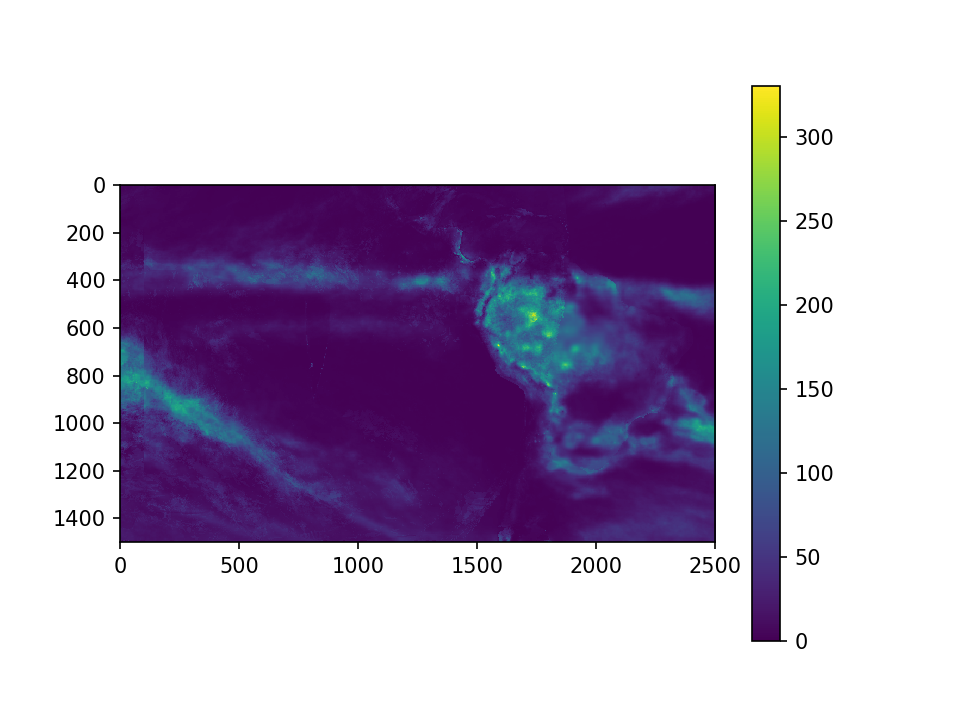

In [87]:
plt.imshow(landsat_pixels[6,500:3000,500:3000])
plt.colorbar()

<IPython.core.display.Javascript object>


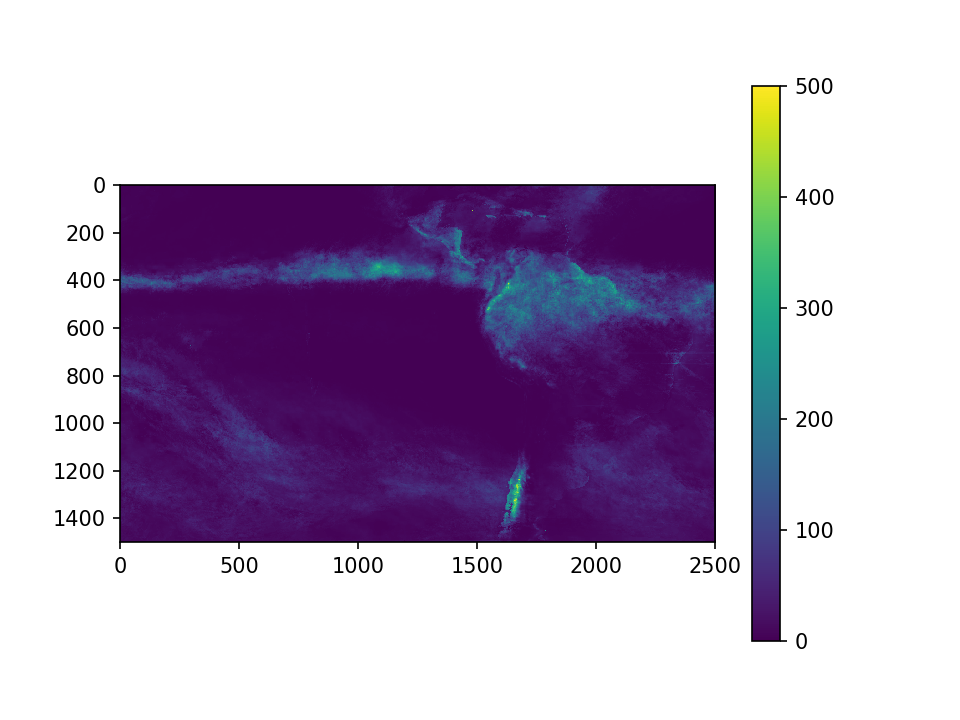

In [88]:
plt.imshow(landsat_pixels[12,500:3000,500:3000])
plt.colorbar()

<IPython.core.display.Javascript object>


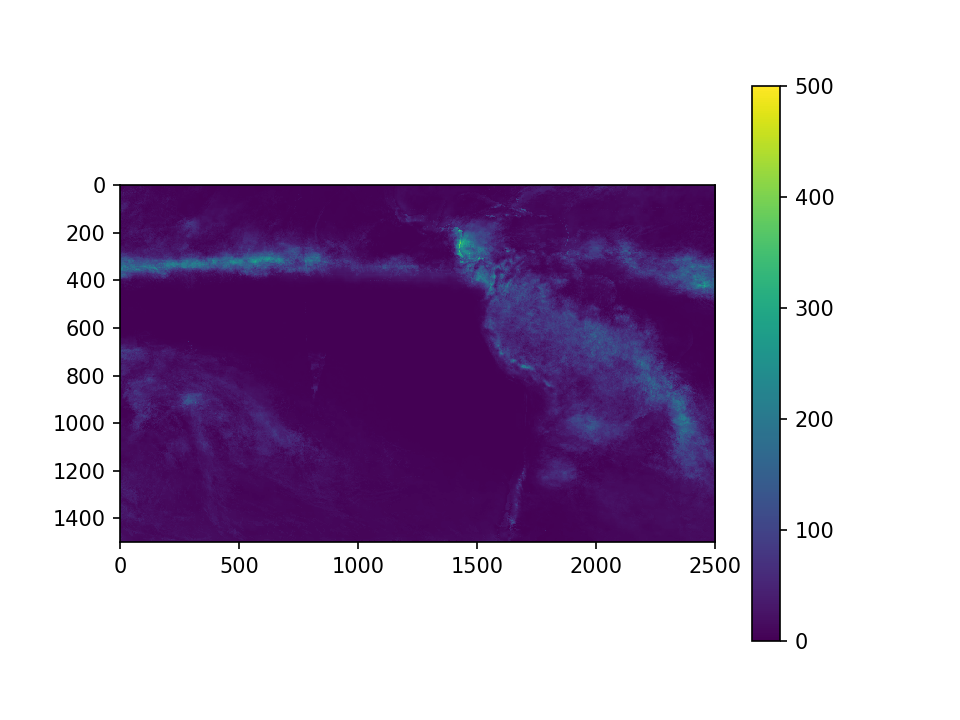

In [89]:
plt.imshow(landsat_pixels[24,500:3000,500:3000])
plt.colorbar()

<IPython.core.display.Javascript object>


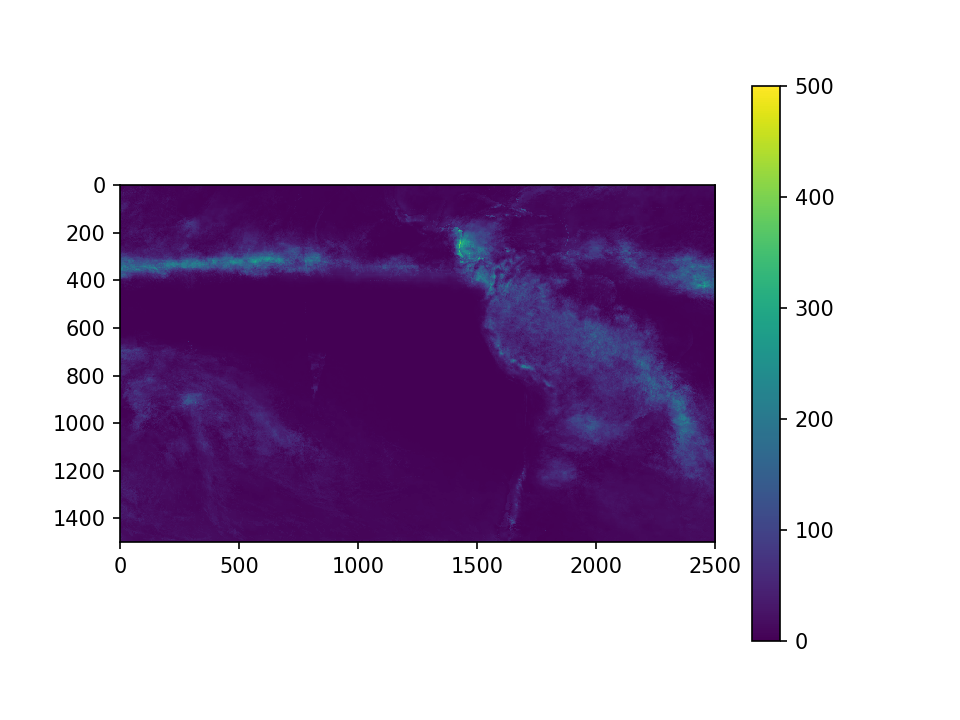

In [90]:
plt.imshow(landsat_pixels[32,500:3000,500:3000])
plt.colorbar()

### Are the rainfall trends periodic? Yes, they seem to be changing over time. 

<IPython.core.display.Javascript object>


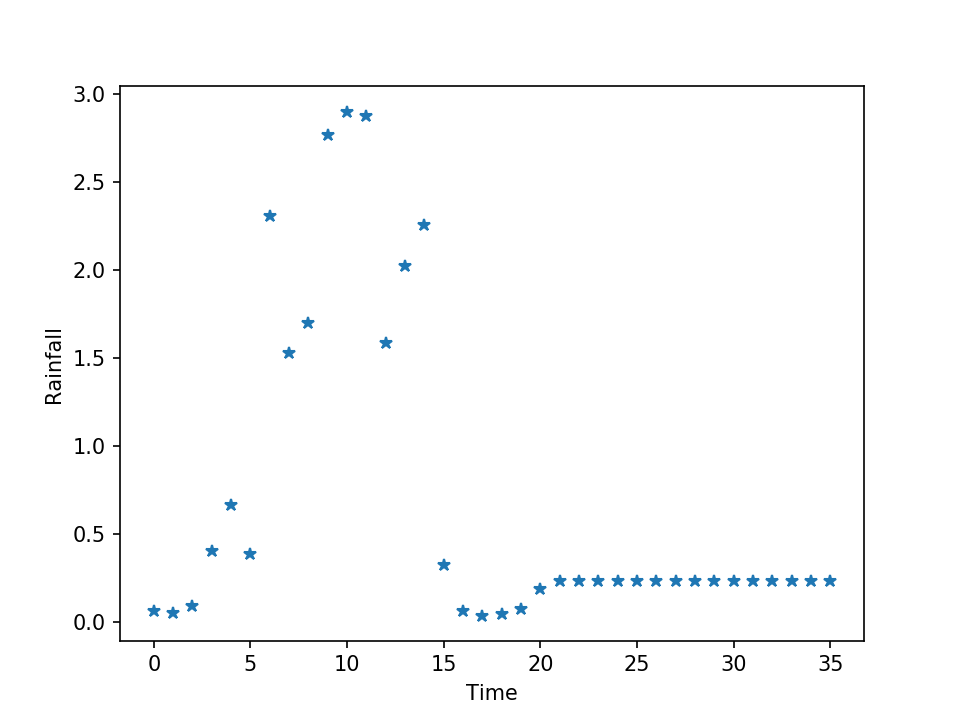

Text(0,0.5,'Rainfall')

In [91]:
plt.plot(landsat_pixels[:,1000,1000], '*')
plt.xlabel('Time')
plt.ylabel('Rainfall')